In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Ejercicio 4

In [2]:
A = np.loadtxt('data/A.txt')
B = np.loadtxt('data/B.txt')
C = np.loadtxt('data/C.txt')
alpha = np.loadtxt('data/alpha.txt')
beta = np.loadtxt('data/beta.txt')
gamma = np.loadtxt('data/gamma.txt')

### Parte a)

In [3]:
x_opt = np.linalg.inv(A.T @ A + B.T @ B + C.T @ C) @ (A.T @ alpha + B.T @ beta + C.T @ gamma)
x_opt

array([-0.45209767, -0.11645923, -0.00416928, -0.06615063,  0.15325308,
        0.12561526, -0.0518167 , -0.00062787, -0.04588603,  0.00636417])

### Parte b)

In [4]:
n = A.shape[0]

# Composicion de D
D = np.zeros((3*n, 3*n))
D[0:n,0:n]=A
D[n:2*n,n:2*n]=B
D[2*n:3*n,2*n:3*n]=C

I = np.identity(n)

# Composicion de H
H = np.zeros((2*n, 3*n))
H[0:n, 0:n] = I
H[0:n, n:2*n] = -I
H[n:2*n, n:2*n] = I
H[n:2*n, 2*n:3*n] = -I

# Composicion de delta
delta = np.zeros(3*n)
delta[0:n] = alpha
delta[n:2*n] = beta
delta[2*n:3*n] = gamma

### Parte c)

In [5]:
lambda_opt = np.linalg.inv(H @ np.linalg.inv(D.T @ D) @ H.T) @ H @ np.linalg.inv(D.T @ D) @ D.T @ delta
lambda_opt

array([ -35.5039017 ,  -58.13500458,  -49.5687729 ,   -6.00575292,
        -20.74913018,  -25.67972695,  -39.77207172,  -42.25391356,
        -37.92853762,  -69.8592178 ,   43.96561715,  -16.9286349 ,
        -36.54879524,  -20.9741974 ,  -24.17324522,  -90.33607098,
       -151.8607936 ,  -25.27311201, -111.95744081,  -24.69133404])

### Parte e)

In [6]:
# Multiplicador base
tau_0 = 1/ np.linalg.norm(D, 2)

# Maximo de iteraciones
k_max = 100

# Condicion de parada (diferencia relativa de entre iterandos)
epsilon_max = 1e-8

# Inicializo w, epsilon y k
w_prev = np.zeros(3*n)
epsilon_k = np.inf
k=0

# Lista para almacenar x_k
x_k_lista1 = []

while k < k_max and epsilon_k > epsilon_max:
    # Calculo tau para esta iteracion
    tau_k = tau_0 * (2**k)

    # Calculo w para esta iteracion
    w_k = np.linalg.inv(D.T @ D + tau_k * H.T @ H) @ (D.T @ delta - H.T @ lambda_opt)

    # Calculo la diferencia relativa entre iterandos
    epsilon_k = np.linalg.norm(w_k - w_prev) / np.linalg.norm(w_k)

    # Cálculo de x_k como el promedio de las entradas de w_k
    x_k = (w_k[0:10] + w_k[10:20] + w_k[20:30]) / 3
    x_k_lista1.append(x_k)

    # Actualizo valores
    w_prev = w_k
    k += 1

iteraciones1= k

print("Iteraciones: ", iteraciones1)

print("x_final: ", x_k)

print("epsilon_k: ", epsilon_k)


Iteraciones:  2
x_final:  [-0.45209767 -0.11645923 -0.00416928 -0.06615063  0.15325308  0.12561526
 -0.0518167  -0.00062787 -0.04588603  0.00636417]
epsilon_k:  1.0873777479461771e-11


### Parte f)

In [7]:
# Inicializo w, epsilon y k
w_prev = np.zeros(3*n)
epsilon_k = np.inf
k=0

# Lista para almacenar x_k
x_k_lista2 = []

while k < k_max and epsilon_k > epsilon_max:
    # Calculo tau para esta iteracion
    tau_k = tau_0 * (2**k)

    # Calculo w para esta iteracion considerando lambda=0
    w_k = np.linalg.inv(D.T @ D + tau_k * H.T @ H) @ (D.T @ delta)

    # Calculo la diferencia relativa entre iterandos
    epsilon_k = np.linalg.norm(w_k - w_prev) / np.linalg.norm(w_k)

    # Cálculo de x_k como el promedio de las entradas de w_k
    x_k = (w_k[0:10] + w_k[10:20] + w_k[20:30]) / 3
    x_k_lista2.append(x_k)

    # Actualizo valores
    w_prev = w_k
    k += 1

iteraciones2 = k

print("Iteraciones: ", iteraciones2)

print("x_final: ", x_k)

print("epsilon_k: ", epsilon_k)

Iteraciones:  42
x_final:  [-0.45209767 -0.11645923 -0.00416928 -0.06615063  0.15325307  0.12561526
 -0.0518167  -0.00062787 -0.04588603  0.00636417]
epsilon_k:  9.37962578237196e-09


### Parte g)

$\tau_k = 10 \tau_0$

In [8]:
# Inicializo lambda, w, epsilon y k
lambda_k = np.zeros(2*n)
w_prev = np.zeros(3*n)
epsilon_k = np.inf
k=0

# Fijo tau_k
tau_k = 10 * tau_0

# Lista para almacenar x_k
x_k_lista3 = []

while k < k_max and epsilon_k > epsilon_max:

    # Calculo w para esta iteracion
    w_k = np.linalg.inv(D.T @ D + tau_k * H.T @ H) @ (D.T @ delta - H.T @ lambda_k)

    # Calculo la diferencia relativa entre iterandos
    epsilon_k = np.linalg.norm(w_k - w_prev) / np.linalg.norm(w_k)

    # Cálculo de x_k como el promedio de las entradas de w_k
    x_k = (w_k[0:10] + w_k[10:20] + w_k[20:30]) / 3
    x_k_lista3.append(x_k)

    # Actualizo valores
    lambda_k += tau_k * H @ w_k
    w_prev = w_k
    k += 1

iteraciones3 = k

print("Iteraciones: ", iteraciones3)

print("x_final: ", x_k)

print("epsilon_k: ", epsilon_k)

Iteraciones:  100
x_final:  [ 0.49428732 -0.359564   -0.86401806 -0.27124434 -0.03539417  0.17024413
 -0.51730138  0.54697099  0.06391845 -0.08557211]
epsilon_k:  0.008246323184209653


$\tau_k = 1000 \tau_0$

In [9]:
# Inicializo lambda, w, epsilon y k
lambda_k = np.zeros(2*n)
w_prev = np.zeros(3*n)
epsilon_k = np.inf
k=0

# Fijo tau_k
tau_k = 1000 * tau_0

# Lista para almacenar x_k
x_k_lista4 = []

while k < k_max and epsilon_k > epsilon_max:

    # Calculo w para esta iteracion
    w_k = np.linalg.inv(D.T @ D + tau_k * H.T @ H) @ (D.T @ delta - H.T @ lambda_k)

    # Calculo la diferencia relativa entre iterandos
    epsilon_k = np.linalg.norm(w_k - w_prev) / np.linalg.norm(w_k)

    # Cálculo de x_k como el promedio de las entradas de w_k
    x_k = (w_k[0:10] + w_k[10:20] + w_k[20:30]) / 3
    x_k_lista4.append(x_k)

    # Actualizo valores
    lambda_k += tau_k * H @ w_k
    w_prev = w_k
    k += 1

iteraciones4 = k

print("Iteraciones: ", iteraciones4)

print("x_final: ", x_k)

print("epsilon_k: ", epsilon_k)

Iteraciones:  100
x_final:  [-0.45180941 -0.11718768 -0.00445706 -0.06611046  0.15273706  0.1260817
 -0.05162811 -0.0011988  -0.04811751  0.00630212]
epsilon_k:  0.00033604526726502363


### parte h)

In [10]:
# Inicializo lambda, w, epsilon y k
lambda_k = np.zeros(2*n)
w_prev = np.zeros(3*n)
epsilon_k = np.inf
k=0

# Lista para almacenar x_k
x_k_lista5 = []

while k < k_max and epsilon_k > epsilon_max:
    # Calculo tau para esta iteracion
    tau_k = tau_0 * (2**k)

    # Calculo w para esta iteracion
    w_k = np.linalg.inv(D.T @ D + tau_k * H.T @ H) @ (D.T @ delta - H.T @ lambda_k)

    # Calculo la diferencia relativa entre iterandos
    epsilon_k = np.linalg.norm(w_k - w_prev) / np.linalg.norm(w_k)

    # Cálculo de x_k como el promedio de las entradas de w_k
    x_k = (w_k[0:10] + w_k[10:20] + w_k[20:30]) / 3
    x_k_lista5.append(x_k)

    # Actualizo valores
    lambda_k += tau_k * H @ w_k
    w_prev = w_k
    k += 1

iteraciones5 = k

print("Iteraciones: ", iteraciones5)

print("x_final: ", x_k)

print("epsilon_k: ", epsilon_k)

Iteraciones:  23
x_final:  [-0.45209767 -0.11645923 -0.00416928 -0.06615063  0.15325308  0.12561526
 -0.0518167  -0.00062787 -0.04588603  0.00636417]
epsilon_k:  1.9359935029953512e-09


### Gráfica de convergencia

In [11]:
valores1 = np.linalg.norm(x_k_lista1 - x_opt, axis=1) / np.linalg.norm(x_opt)
valores2 = np.linalg.norm(x_k_lista2 - x_opt, axis=1) / np.linalg.norm(x_opt)
valores3 = np.linalg.norm(x_k_lista3 - x_opt, axis=1) / np.linalg.norm(x_opt)
valores4 = np.linalg.norm(x_k_lista4 - x_opt, axis=1) / np.linalg.norm(x_opt)
valores5 = np.linalg.norm(x_k_lista5 - x_opt, axis=1) / np.linalg.norm(x_opt)

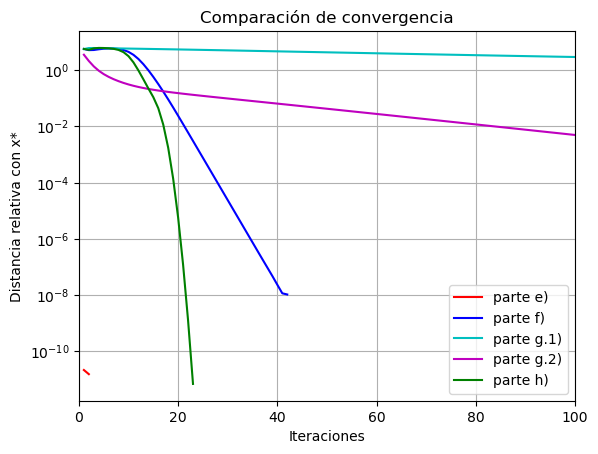

In [12]:
plt.figure()
plt.xlim(0,100)


plt.semilogy(range(1,iteraciones1+1), valores1, color = 'r', label= "parte e)")
plt.semilogy(range(1,iteraciones2+1), valores2, color = 'b', label= "parte f)")
plt.semilogy(range(1,iteraciones3+1), valores3, color = 'c', label= "parte g.1)")
plt.semilogy(range(1,iteraciones4+1), valores4, color = 'm', label= "parte g.2)")
plt.semilogy(range(1,iteraciones5+1), valores5, color = 'g', label= "parte h)")

plt.grid("On")
plt.title("Comparación de convergencia")
plt.ylabel("Distancia relativa con x*")
plt.xlabel("Iteraciones")

plt.legend()
